In [1]:
#importing useful libraries
import numpy as np
import pandas as pd
#import seaborn to plot historgrams 
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import sem, t
from scipy import mean


#reading datasets by majors which include starting, median, and percentile salaries
majors = pd.read_csv('Downloads/college-salaries/degrees-that-pay-back.csv') 

#setting up dollar variable which contains only collumns involving dollar sign
dollar_sign = ['Starting Median Salary','Mid-Career Median Salary','Mid-Career 10th Percentile Salary',
               'Mid-Career 25th Percentile Salary','Mid-Career 75th Percentile Salary',
               'Mid-Career 90th Percentile Salary']

#converting string values of the majors dataset containing dollar signs into string values
for x in dollar_sign:
    majors[x] = majors[x].str.replace("$","")
    majors[x] = majors[x].str.replace(",","")
    majors[x] = pd.to_numeric(majors[x])
    
#show first 5 rows of data
majors.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


In [2]:
#generating descriptive statistics that summarize the central tendency and shape of a dataset’s distribution to use this as aguide for further calculations
#the function analyzes majors DataFrame columns of various numeric entrees about salaries and gives back count, mean, std, min, max, lower(25%), 50 and upper percentiles (75%).
majors.describe()

,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,44310.000000,74786.00000,69.274000,43408.000000,55988.000000,102138.000000,142766.000000
std,9360.866217,16088.40386,17.909908,12000.779567,13936.951911,20636.789914,27851.249267
min,34000.000000,52000.00000,23.400000,26700.000000,36500.000000,70500.000000,96400.000000
25%,37050.000000,60825.00000,59.125000,34825.000000,44975.000000,83275.000000,124250.000000
50%,40850.000000,72000.00000,67.800000,39400.000000,52450.000000,99400.000000,145500.000000
75%,49875.000000,88750.00000,82.425000,49850.000000,63700.000000,118750.000000,161750.000000
max,74300.000000,107000.00000,103.500000,71900.000000,87300.000000,145000.000000,210000.000000


In [25]:
#dividing majors into 2 dataset according to Minerva colleges
#computational sciences
cs = ["Computer Science" , "Math", "Information Technology (IT)", "Computer Engineering",
      "Management Information Systems (MIS)", "Graphic Design", "Industrial Engineering", "Civil Engineering",
     "Electrical Engineering", "Aerospace Engineering"]
#social sciences
ss =["Economics", "Political Science", "Journalism", "Psychology","Sociology", "Forestry", "Criminal Justice", 
     "Communications", "Philosophy", "International Relations"]
#lists for the median salary of the two new datasets
#even though we don't have actual control/test groups as we don't do interventional study
#I'm naming new list test and control to make clear difference for myself later in code
test = []
control = []

#iteratting through rows of the original dataset to create two lists containing only mid career median salary 
#for SS and CS majors
for index, row in majors.iterrows():
    if row['Undergraduate Major'] in cs:
        test.append(row["Mid-Career Median Salary"])      
    elif row['Undergraduate Major'] in ss:
        control.append(row["Mid-Career Median Salary"])

#calculating mean, median and standart deviation of test and control datasets 
#numpy mean function which takes in a given list and returns the average of the elements in given list of data
mean_cs = round(np.mean(test))
mean_ss = np.mean(control)
#numpy median function which takes in a given list and returns the median of the list elements
median_cs= np.median(test)
median_ss= np.median(control)
#numpy std function which takes in a given list and returns the standard deviation, the spread of a distribution, 
#of the elements in a given list
sd_cs = np.std(test)
sd_ss = np.std(control)


#calculating the number of elements in each group
n_cs= len(test)
n_ss= len(control)

#using sem() function from scipy package, we calculate the standard error of the mean of the values in test and 
#control lists by using formula of standart error of the mean(SEM) - s/sqrt(n) where s is the sample standard 
#deviation and n is the sample size
std_err_cs = sem(test)
std_err_ss = sem(control)

class display(object):
    #Display HTML representation of multiple objects, the code for making a table is taken from 
    #https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html
    template = """<div style="float: left; padding: 12px;">
    <p style='font-family:"Times New Romans", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

#creating a table using calculated stats
figure1 = pd.DataFrame({'Major Type': ['Computational Sciences', 'Social Sciences'],
                        'Number of majors': [n_cs, n_ss],
                        'Mean of salaries': [mean_cs, mean_ss],
                        'Median of salaries': [median_cs, median_ss],
                       'Standart Deviation':[sd_cs, sd_ss]})
display('figure1')

,Major Type,Number of majors,Mean of salaries,Median of salaries,Standart Deviation
0,Computational Sciences,10,89900.0,93550.0,13325.239210
1,Social Sciences,10,71310.0,68350.0,12637.361275


In [69]:
#calculating confidence interval
confidence = 0.95
#by using confidence intervals formula for t-distribution, we calculate the multiplication of standart deviation/sqrt
#of a sample size by t-score for cs:
h = t_score * np.sqrt(sd_cs**2/n_cs)
#calculating lower bond
start_cs = mean_cs - h
#upper bond
end_cs = mean_cs + h
print("The lower bound of the interval for cs is " + str(round(start_cs)))
print("The upper bound of the interval for cs is " + str(round(end_cs)))

#by using confidence intervals formula, we get for ss:
h = t_score * np.sqrt(sd_ss**2/n_ss)
#calculating lower bond
start_ss = mean_ss - h
#upper bond
end_ss = mean_ss + h
print("The lower bound of the interval for ss is " + str(round(start_ss)))
print("The upper bound of the interval for ss is " + str(round(end_ss)))





The lower bound of the interval for cs is 76411.0
The upper bound of the interval for cs is 103389.0
The lower bound of the interval for ss is 58518.0
The upper bound of the interval for ss is 84102.0


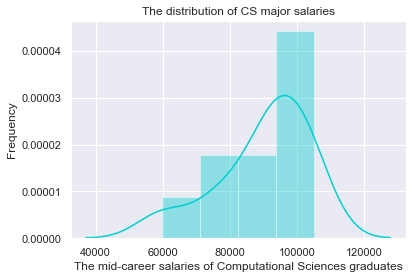

In [34]:
#making histograms using seaborn library for test group
sns.set()
#importing our test group data
sns.distplot( test, color = 'darkturquoise' )
#labeling
plt.title("The distribution of CS major salaries")
plt.xlabel("The mid-career salaries of Computational Sciences graduates")
plt.ylabel("Frequency")
plt.show()


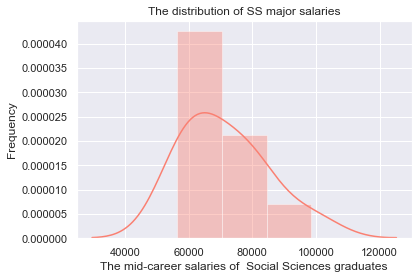

In [35]:
#making histograms using seaborn library for cotrol group
sns.set()
#importing our test group data
sns.distplot(control, color = 'salmon')
#labeling
plt.title("The distribution of SS major salaries")
plt.xlabel("The mid-career salaries of  Social Sciences graduates")
plt.ylabel("Frequency")
plt.show()


In [51]:
#finding point estimate for my data samples
#we are substracting from mean_cs since our alternative hypothesis states that CS majors earn more
point_estimate = mean_cs - mean_ss
#calculating standart error of the sample population of CS and SS majors using 
standard_error = np.sqrt(sd_cs**2/n_cs + sd_ss**2/n_ss)
#finding t-score by using point estimate and standart error 
t_score = (point_estimate - 0)/standard_error
print ("Point estimate is", point_estimate)
print ("Standart error is",standard_error)
print ("T-score is",t_score)

Point estimate is 18590.0
Standart error is 5807.451248181082
T-score is 3.201060018510266


In [50]:
#creating a function which will calculate the difference of means. taking in both of the data subsets and the number 
#of tails
def dmt(data1,data2,tails):
    
    #including Bessel’s correction as our sample sizes are less than 30 to avoid conducting type 1 error to find 
    #standart deviation for both samples
    #for cs
    s1 = np.std(data1,ddof=1) 
    #for ss
    s2 = np.std(data2,ddof=1)
    
    #degrees of freedom
    df = min(n_cs,n_ss) - 1 
    #calculating p-value using numbers of tails, t_score and degrees of freedom
    p_value = tails*stats.t.cdf(-t_score,df)
    
    #using Cohens D value formula, we calculate that:
    Cohensd = (mean_cs - mean_ss)/SDpooled
    #calculating HedgesG as our sample population size is smaller than 30. We calculate it using Cohensd multipled by 
    #(1-3/(4*(n1+n2)-9)
    HedgesG = Cohensd*(1-3/(4*(n_cs+n_ss)-9))
    
    #p-value
    print('p =',p_value)
    #effect size for both d and g 
    print('d =',Cohensd)
    print('g = ', HedgesG)
dmt(test, control, tails=1) #setting talis to 1 as we are doing one side test becuase of our alternative hypothesis

p = 0.005406447039175174
d = 1.3580947476442466
g =  1.300710462532518
